## Note: The package you may need to do this lab is **scipy.stats**
!pip install scipy


!pip install seaborn
### Task 1 - Binomial Distribution (hint: use binom)

60% of a large software company’s customers use the latest version of its operating system.  If a random sample of 25 customers are selected for a telephone survey, write a code (use binomial distribution) to calculate the probability that:



*   exactly 8 customers who uses the latest version is selected
*   more than 6 customers who uses the latest version are selected
*   atmost 12 customers who uses the old version are selected
* plot a binomial distrution of number of customers using latest version of operating system







 Probability of exactly 8 customers is: 0.003120947735557764
 Probability of more than 6 customers is: 0.999719284752399
 Probability of atmost 12 customers is: 0.8462322310242371


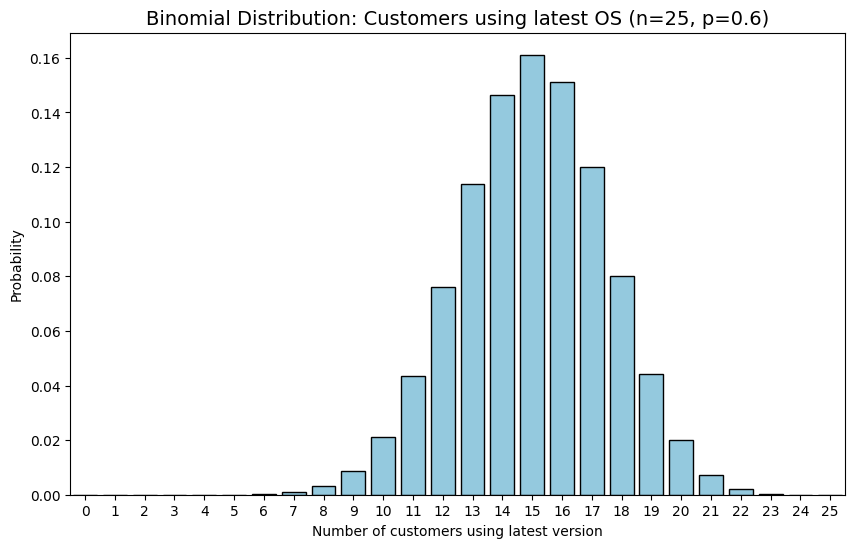

In [22]:
#Import libraries
import scipy.stats as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random as rd


#Using Binomial Distribution

n = 25
p = 0.6 #probability of selecting latest version of operating system

# For exacly 8 customers ( First Question is done for you)
print(" Probability of exactly 8 customers is:", sc.binom.pmf(8,n,p))

# For more than 6 customers P(X>6) = 1 - P(X<=6)
print(" Probability of more than 6 customers is:", 1 - sc.binom.cdf(6, n, p))

# For atmost 12 customers
print(" Probability of atmost 12 customers is:", sc.binom.cdf(12, n, 0.4))


#Probability Distribution
x = np.arange(0, n+1)
y = sc.binom.pmf(x, n, p)

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, color="skyblue", edgecolor="black")
plt.title("Binomial Distribution: Customers using latest OS (n=25, p=0.6)", fontsize=14)
plt.xlabel("Number of customers using latest version")
plt.ylabel("Probability")
plt.show()

### Task 2 - Normal Distribution (hint:use norm)

The length of time taken for queries to a mobile network company to be resolved is approximately normally distributed with a mean of 20 hours and a standard deviation of 5 hours.
Determine the proportion of queries which take:

* longer than 25 hours to resolve;

* less than 18 hours to resolve;

* between 15 and 30 hours.

* minimum number of hours within which 70% of queries are resolved.


In [23]:
# Using Normal Distribution ( Write you code here)
mean = 20
sd = 5

# More than 25 hours (first queston done for you)
print("Proportion of Queries that take more than 25 hours to resolve:", 100*(1- sc.norm.cdf(25,mean,sd)),"%")

# Less than 18 horus
print("Proportion of Queries that take less than 18 hours to resolve:", 100*(sc.norm.cdf(18, mean, sd)), "%")

# Between 15 to 30 horus
print("Proportion of Queries that take between 15 and 30 hours:", 100*(sc.norm.cdf(30, mean, sd) - sc.norm.cdf(15, mean, sd)), "%")

# Number of hours for 70% of queries
print("Minimum number of hours within which 70% of queries are resolved:", sc.norm.ppf(0.70, mean, sd))

Proportion of Queries that take more than 25 hours to resolve: 15.865525393145708 %
Proportion of Queries that take less than 18 hours to resolve: 34.45782583896758 %
Proportion of Queries that take between 15 and 30 hours: 81.85946141203637 %
Minimum number of hours within which 70% of queries are resolved: 22.622002563540203


### Task 3 - Poisson Distribution and Central Limit Theorem.

The rate of the number of calls to a customer service center is equal to 9 calls per minute.

* Generate and plot a histogram (count Vs distribution) of a poisson distrbution of size 10,000 of the number of calls per minute. Compare this with the probability density plot (density Vs distribution).
* What is the probability of getting more than 16 calls per minute? Find the count(out of 10,000 instances) of getting more than 16 calls per minute.
* Show that the means of the samples (greater than 30) taken from this poisson distrbution is normally distributed (Center limit Theorem).

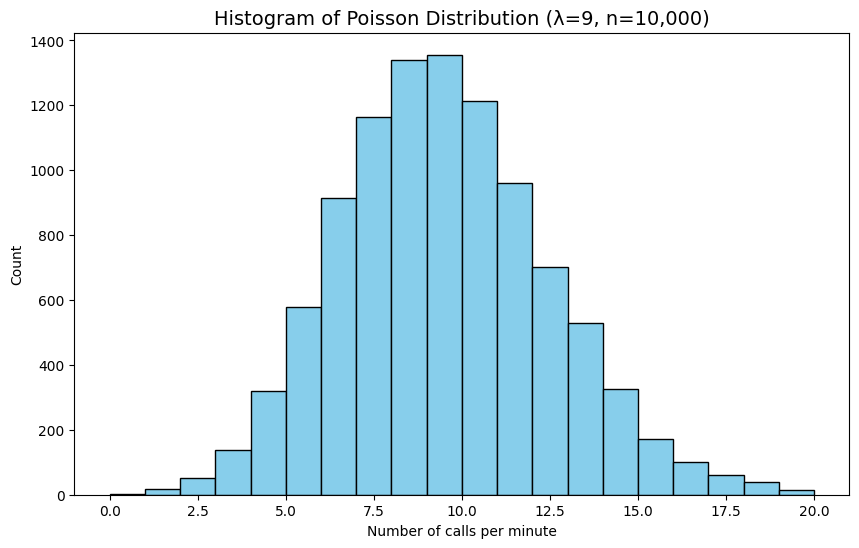

In [27]:
# Generate and plot poisson distribution. You can create additional code cells to display outputs
# hint use poisson.rvs to generate distributin data

data = sc.poisson.rvs(mu=9, size=10000)


plt.figure(figsize=(10,6))
plt.hist(data, bins=20, color="skyblue", edgecolor="black")
plt.title("Histogram of Poisson Distribution (λ=9, n=10,000)", fontsize=14)
plt.xlabel("Number of calls per minute")
plt.ylabel("Count")
plt.show()


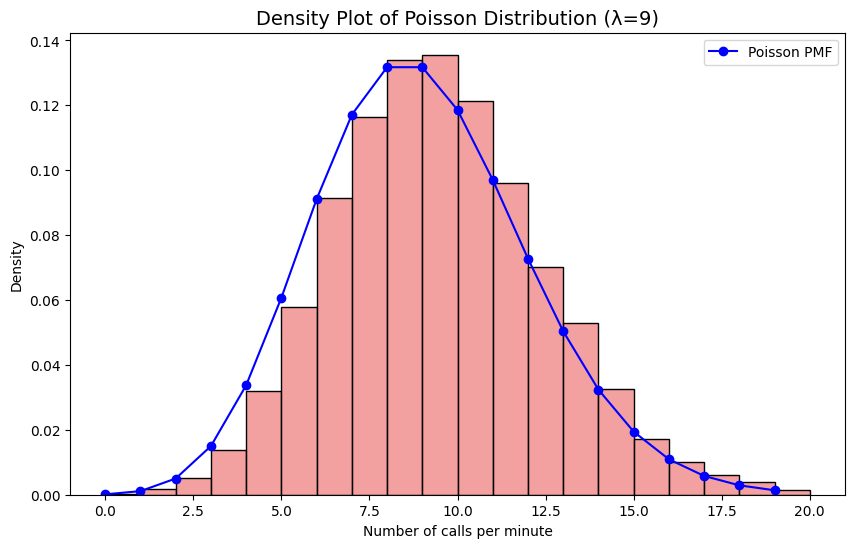

In [36]:
# Plot for density
plt.figure(figsize=(10,6))
sns.histplot(data, bins=20, stat="density", color="lightcoral", edgecolor="black", kde=False)
x = np.arange(0, max(data))
plt.plot(x, sc.poisson.pmf(x, mu=9), 'bo-', label="Poisson PMF")
plt.title("Density Plot of Poisson Distribution (λ=9)", fontsize=14)
plt.xlabel("Number of calls per minute")
plt.ylabel("Density")
plt.legend()
plt.show()

Probability of more than 16 calls per minute: 0.011105909377583822
Count of more than 16 calls out of 10,000: 116


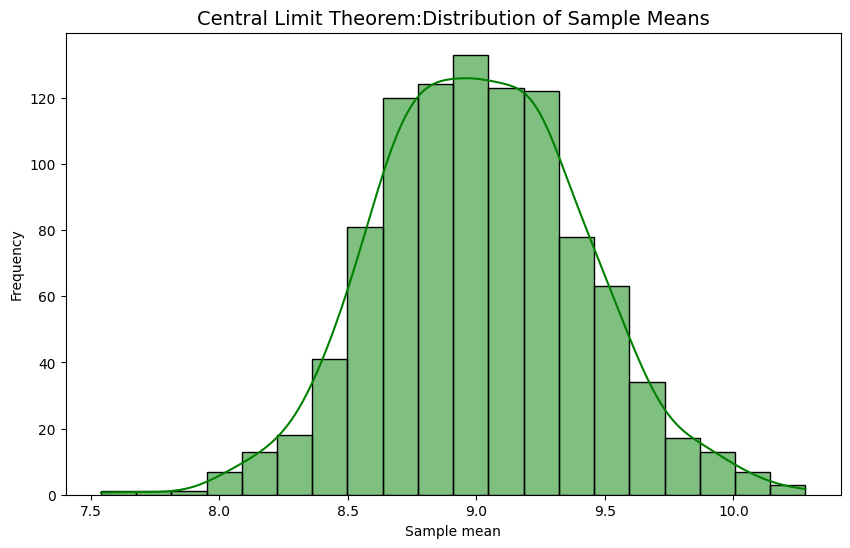

In [41]:
# probability of getting more than 16 calls P(X>16) = 1 - P(X<=16)
prob_more_16 = 1 - sc.poisson.cdf(16, mu=9)
count_more_16 = np.sum(data > 16)
print("Probability of more than 16 calls per minute:", prob_more_16)
print("Count of more than 16 calls out of 10,000:", count_more_16)

# To prove the central limit theorem

sample_means = []
for i in range(1000):
    sample = np.random.choice(data,size=50, replace=True)
    sample_means.append(np.mean(sample))

# Plot distribution of sample means
plt.figure(figsize=(10,6))
sns.histplot(sample_means,bins=20,kde=True, color="green", edgecolor="black")
plt.title("Central Limit Theorem:Distribution of Sample Means", fontsize=14)
plt.xlabel("Sample mean")
plt.ylabel("Frequency")
plt.show()